# **Setup**
 
Reset the Python environment to clear it of any previously loaded variables, functions, or libraries. Then, import the libraries needed to complete the code Professor Melnikov presented in the video.

In [1]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS
IS.ast_node_interactivity = "all"    # allows multiple outputs from a cell
import nltk, collections, numpy as np, pandas as pd, matplotlib.pyplot as plt

<hr style="border-top: 2px solid #606366; background: transparent;">

# **Review**

<h3 style="color:black">Sliding Windows and <code>NGram()</code> to Improve the Long Tail Problem</h3>

<span style="color:black"> You will learn how to create sliding windows, or *n*-grams, on a sequence of characters and use them to create a list of subwords to improve the long-tail problem.

<span style="color:black"> First create a simple function, `NGram()`, which produces subwords of size $n$ from any sequence of characters (or any list of elements).

In [2]:
def NGram(seq='alice', n=3):
    'Creates windows of characters of size n'
    return [seq[i:(i+n)] for i in range(len(seq) - n + 1)]  # n-window sliding by 1 character in each step

NGram(seq='alice', n=3)
NGram(seq='Alice', n=3)

['ali', 'lic', 'ice']

['Ali', 'lic', 'ice']

<span style="color:black"> Notice that the words "alice" and "Alice" overlap on two out of the three possible three-character length subwords (66.67% overlap).

<span style="color:black"> Change the length of the sliding window ($n$) and observe the resulting subwords.

In [3]:
NGram(seq='alice', n=2)
NGram(seq='alice', n=3)
NGram(seq='alice', n=4)
NGram(seq='alice', n=5)
NGram(seq='alice', n=6)

['al', 'li', 'ic', 'ce']

['ali', 'lic', 'ice']

['alic', 'lice']

['alice']

[]

Notice that longer windows result in fewer subwords. You want subwords to be meaningful but sufficiently short. So one-character subwords are too short, since a character rarely captures the sense of the word it is in. Having very long subwords makes them too unique, thereby losing the benefit you seek. Ultimately, subwords should be representative but as short as possible.


Here is another example of original and misspelled words. Since these words are longer, they will have greater overlap in subwords. If each subword is represented by a subword vector, which are then aggregated to represent a word, there should be notable similarity among vectors of these two words.

In [4]:
NGram(seq='colaborator', n=3)
NGram(seq='collaborator', n=5)

['col', 'ola', 'lab', 'abo', 'bor', 'ora', 'rat', 'ato', 'tor']

['colla', 'ollab', 'llabo', 'labor', 'abora', 'borat', 'orato', 'rator']

## Generate Subwords With `nltk`'s `ngrams` Object

`nltk` has an `ngrams` object, which generates subwords by sliding a window of size `n`. However, it actually returns a [generator](https://docs.python.org/3/glossary.html#term-generator-iterator), not a list. Generators are fast but can only be traversed once (and, typically, are meant for a single use).

In [5]:
nltk.ngrams(sequence='alice', n=3) # generator is fast, but can only be traversed once

<span style="color:black">To view the result from the generator, you need to wrap it as a list, tuple, or a similar container.

In [6]:
list(nltk.ngrams(sequence='alice', n=3))  # list of tuples of characters from subwords

[('a', 'l', 'i'), ('l', 'i', 'c'), ('i', 'c', 'e')]

<span style="color:black">Reproduce the sliding window function from above using `nltk`'s generator.

In [7]:
[''.join(g) for g in nltk.ngrams(sequence='alice', n=3)]

['ali', 'lic', 'ice']

<span style="color:black">You can generalize the windowing method by creating a function that can take a sequence and return subwords for a range of window lengths. Evaluate this function on a single word with different parameters.

In [8]:
def NGramRange(seq='wonderland', nmin=3, nmax=6, AddSeq=True):
    ''' Builds a list of string character n-grams for a string `seq`,
    where n-grams vary from `nmin` to `nmax` in length.
    For invalid n-gram specification returns the original string.
    AddSeq: indicates whether the original sequence should be included in returned list,
        if its length exceeds nmax. Not implemented    '''
    NGrams = []
    nMax = min(nmax + 1, len(seq) + 1)
    for n in range(nmin, nMax + 1):
        NGrams.extend([''.join(g) for g in nltk.ngrams(sequence=seq, n=n)])  # sliding window
    return NGrams if NGrams else [seq]

print(NGramRange('alice', nmin=6, nmax=2))
print(NGramRange('alice', nmin=1, nmax=2))
print(NGramRange('alice', nmin=2, nmax=5))
print(NGramRange('alice', nmin=2, nmax=10))

['alice']
['a', 'l', 'i', 'c', 'e', 'al', 'li', 'ic', 'ce', 'ali', 'lic', 'ice']
['al', 'li', 'ic', 'ce', 'ali', 'lic', 'ice', 'alic', 'lice', 'alice']
['al', 'li', 'ic', 'ce', 'ali', 'lic', 'ice', 'alic', 'lice', 'alice']


<span style="color:black">Next, build a similar function that takes a list of words and returns a list of all possible subwords (between a specified window range) generated from all words.

In [9]:
def NGramRangeList(LsSeq=['alice','rabbit'], nmin=3, nmax=6):
    '''
    Calls `NGramRange()` for each string in the list of strings `LsSeq` 
    with specified `nmin` and `nmax` arguments.
    '''
    LsGrams = []
    for w in LsSeq:
        LsGrams.extend(NGramRange(w, nmin, nmax))
    return LsGrams

print(NGramRangeList(LsSeq=['lewis','carroll'], nmin=3, nmax=4))

['lew', 'ewi', 'wis', 'lewi', 'ewis', 'lewis', 'car', 'arr', 'rro', 'rol', 'oll', 'carr', 'arro', 'rrol', 'roll', 'carro', 'arrol', 'rroll']


Here is another example with a few morphologically different words with some shared meaning. They generate many common subwords.

In [10]:
print(NGramRangeList(LsSeq=['learn', 'learned', 'learnt'], nmin=3, nmax=6))

['lea', 'ear', 'arn', 'lear', 'earn', 'learn', 'lea', 'ear', 'arn', 'rne', 'ned', 'lear', 'earn', 'arne', 'rned', 'learn', 'earne', 'arned', 'learne', 'earned', 'learned', 'lea', 'ear', 'arn', 'rnt', 'lear', 'earn', 'arnt', 'learn', 'earnt', 'learnt']


<h3 style="color:black">Subwords</h3>

<span style="color:black"> You will now use these functions to generate subwords for the *Alice's Adventures in Wonderland* document. Load the lowercased words of 4+ letters from the document.

In [11]:
_ = nltk.download(['gutenberg','punkt'], quiet=True)
LsWords = nltk.corpus.gutenberg.words('carroll-alice.txt')
LsWords = [w.lower() for w in LsWords if w.isalpha() and (len(w) > 3)] # lower case and keep words with 4+ letters
print(LsWords[:10])

['alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'chapter', 'down', 'rabbit', 'hole', 'alice']


<span style="color:black">Generate subwords using sliding windows beween the lengths of three and six, which was used in the original FastText implementation. Compare the count of (preprocessed) words with the count of resulting subwords.

In [12]:
LsSubwords = NGramRangeList(LsWords, nmin=3, nmax=6)
print(f'{len(LsWords)}', LsWords[:20])
print(f'{len(LsSubwords)}', LsSubwords[:20])
print(f'Word vocab: {len(set(LsWords))}')
print(f'Subword vocab: {len(set(LsSubwords))}')
print(f'Words longer than 6 characters: ', len([w for w in LsWords if len(w)>6]))

14154 ['alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'chapter', 'down', 'rabbit', 'hole', 'alice', 'beginning', 'very', 'tired', 'sitting', 'sister', 'bank', 'having', 'nothing', 'once', 'twice']
117421 ['ali', 'lic', 'ice', 'alic', 'lice', 'alice', 'adv', 'dve', 'ven', 'ent', 'ntu', 'tur', 'ure', 'res', 'adve', 'dven', 'vent', 'entu', 'ntur', 'ture']
Word vocab: 2347
Subword vocab: 15063
Words longer than 6 characters:  3080


<span style="color:blaack">The number of tokens has increased about 8.4 times after subword token generation, from ~14K to ~117K tokens. The unique tokens have also increased about 6.4 times. The real question is whether you now have a larger fraction of tokens with higher counts.

<span style="color:black">Now you are ready to evaluate the benefit from subwords in reducing the long tail of the original distribution of (preprocessed) word counts. Plot the distribution and a threshold.

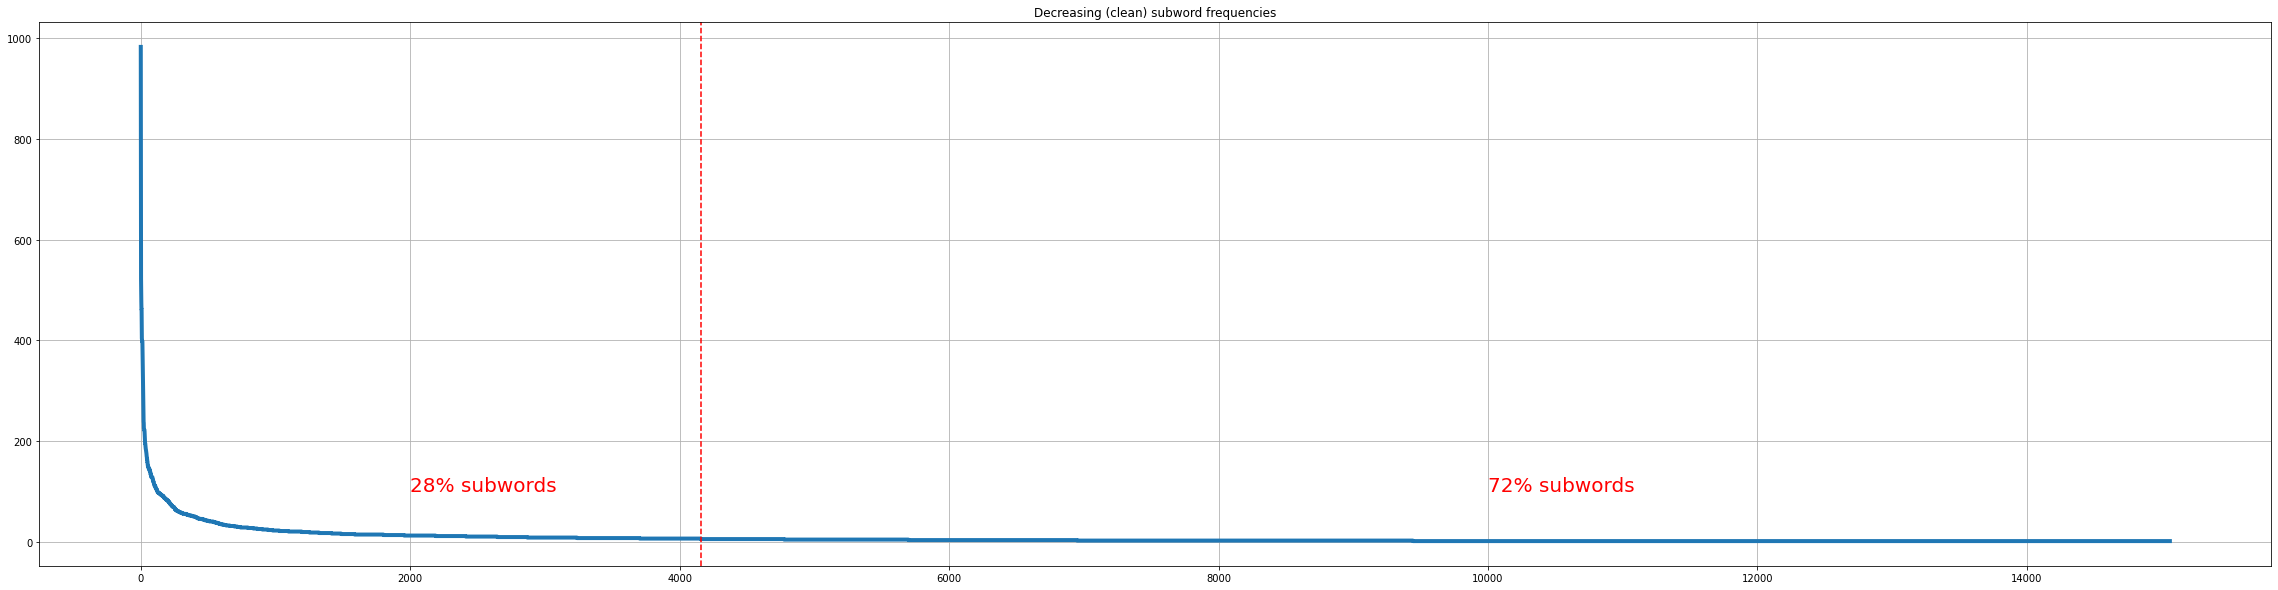

In [13]:
df = pd.DataFrame(collections.Counter(LsSubwords).most_common(), columns=['word', 'freq'])
HiFreqSubwords = (df.freq >= 6)   # say, we only train vectors for words that appear 5+ times

vPct = HiFreqSubwords.value_counts(normalize=True).values*100
ax = df.freq.plot(figsize=(40,10), title='Decreasing (clean) subword frequencies', grid=True, lw=4);
ax.axvline(sum(HiFreqSubwords), color='r', linestyle='--');
ax.text(2000, 100, f'{vPct[1]:.0f}% subwords', size=20, color='r');
ax.text(10000, 100, f'{vPct[0]:.0f}% subwords', size=20, color='r');
# ax.set_xlabel("subword index");
# ax.set_ylabel("subword frequency");

<span style="color:black">Nearly 30% of subwords have frequencies higher than 5. That's a 30% improvement over the original 20/80 distribution you saw earlier. With an even larger corpus, this long tail will become even smaller.

<hr style="border-top: 2px solid #606366; background: transparent;">

# **Optional Practice**

Below you will experiment with subwords to understand them better and improve the subword sampling function `NGramRange()` to include the original words which are longer than `nmax`.

As you work through these tasks, check your answers by running your code in the *#check solution here* cell, to see if you’ve gotten the correct result. If you get stuck on a task, click the See **solution** drop-down to view the answer.

## Task 1

Build a [Jaccard similarity](https://scikit-learn.org/stable/modules/model_evaluation.html#jaccard-similarity-score) function, `JacardSim(A, B)`, which takes two sets, $A$ and $B$, and divides the size of their intersection by the size of their union, i.e., $|A\cap B|/|A\cup B|$. The **size** (aka **cardinality**) of a set is just the number of elements in a set. 0 means the two sets have no elements in common. 1 means the sets are the same. Test your code. 

Then use this to measure the similarity between a set of three-character subwords on "colaborator" vs. "collaborator," or "Cornell" vs. "eCornell," or even phrases "NLP rocks" vs. "NLP is rocking." The two words above should produce ~0.7273.  Do you think this numeric similarity represents the semantic similarity between the two words?

<b>Hint:</b> Try the <code>intersection</code> and <code>union</code> methods of a `set` object to compute these operations. See Python documentation on sets.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
JaccardSim = lambda A=set(), B=set(): len(A.intersection(B))/ len(A.union(B))  # Jaccard similarity = intersection/union
print('collaborator:', JaccardSim(set(NGram(seq='colaborator', n=3)), set(NGram(seq='collaborator', n=3))))
print('cornell:', JaccardSim(set(NGram(seq='Cornell', n=3)), set(NGram(seq='eCornell', n=3))))
print('NLP:', JaccardSim(set(NGram(seq='NLP rocks', n=3)), set(NGram(seq='NLP is rocking', n=3))))
</pre>
The numeric similarity appears to reasonably represent the semantic similarity in all these phrases. Notably, windowing works on a string of characters, even those are spaces. Similarly, we could create phrase (or even a sentence) vectors from the vectors of the resulting ngrams. In fact, FastText can produce vectors for the phrases and sentences as well. These are not the highest quality, but convenient.</details> 
</font>
<hr>

## Task 2

Keeping the function name the same, improve the `NGramRange()` function used above by adding and utilizing `AddSeq` as a function parameter. Note that the `AddSeq` parameter indicates whether the original sequence should be included in the returned list. Test this function to confirm that the sequence word is added to the output list as intended when `AddSeq=True` or if its length is less than `nmax`. 


<b>Hint:</b> Add an additional <code>if</code> statement to decide whether to include the original sequence of characters.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
def NGramRange(seq='wonderland', nmin=3, nmax=6, AddSeq=True):
    ''' Builds a list of string character n-grams for a string `seq`,
    where n-grams vary from `nmin` to `nmax` in length.
    For invalid n-gram specification returns the original string.
    AddSeq: indicates whether the original sequence should be included in returned list,
        if its length exceeds nmax. Not implemented    '''
    NGrams = []
    nMax = min(nmax + 1, len(seq) + 1)
    for n in range(nmin, nMax + 1):
        NGrams.extend([''.join(g) for g in nltk.ngrams(sequence=seq, n=n)])  # sliding window
    if AddSeq and len(seq)>nmax: NGrams += [seq]
    return NGrams if NGrams else [seq]

print(NGramRange('alice', nmin=1, nmax=2, AddSeq=True))
print(NGramRange('alice', nmin=1, nmax=2, AddSeq=False))
    </pre>
    </details> 
</font>
<hr>

## Task 3

Derive sets of subwords from "wonderland" and "wonderful." Then, compute Jaccard similarity between the two sets. Do you think this numeric similarity represents the semantic similarity between the two words?

<b>Hint:</b> Similar to the above use of <code>JaccardSim</code>. Don't forget to make sets from lists.

In [ ]:
# check solution here

<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
JaccardSim(set(NGramRange('wonderland')), set(NGramRange('wonderful')))
    </pre>
    </details> 
</font>
<hr>

## Task 4

Use `NGramRangeList()` (which uses your new definition of `NGramRange`) to produce `LsSubwords2` with original words included in the list of subwords. Plot the distribution of decreasing counts and the threshold. Is the long tail smaller now (in counts and in percent)?

<b>Hint:</b> Similar to how you plotted above.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
LsSubwords2 = NGramRangeList(LsWords, nmin=3, nmax=6)
df = pd.DataFrame(collections.Counter(LsSubwords2).most_common(), columns=['word', 'freq'])
HiFreqSubwords = (df.freq >= 6)   # say, we only train vectors for words that appear 5+ times

vPct = HiFreqSubwords.value_counts(normalize=True).values * 100
ax = df.freq.plot(figsize=(40, 10), title='Decreasing (clean) subword frequencies', grid=True, lw=4);
ax.axvline(sum(HiFreqSubwords), color='r', linestyle='--');
ax.text(2000,  100, f'{vPct[1]:.0f}% subwords', size=20, color='r');
ax.text(10000, 100, f'{vPct[0]:.0f}% subwords', size=20, color='r');
ax.set_xlabel("subword index");
ax.set_ylabel("subword frequency");
    </pre>
    </details> 
</font>
<hr>

# Remarks and Additional Information


You have not implemented the FastText model in this activity because the files needed to train the model are much larger (in byte size) files. However, you can try this on your own by loading the following code. Note that if the model stops working, it's probably because the model or Gensim package was updated. You can visit Gensim's website for the up-to-date sample code. The conceptual functionality will not change. Some ideas to try: 

1. Retrieve out-of-vocabulary (OOV) words, such as your name. Even a full name (as a single string) should work.
1. Find words similar to your name.
1. Retrieve vectors for correct and misspelled words. Compare cosine similarity (as we did earlier). 
    1. Gensim, Scikit-learn, and SciPy have cosine similarity function or you can use what we created earlier.


FYI: Downloading the FastText model of 2.4 GB and loading it to memory can take three minutes. But, then it's fast to use. Since such a memory footprint is too large for the current environment, enabling the lines below causes the Python kernel to crash (due to lack of memory). However, you can copy and use the code lines below in an environment with a larger memory footprint, such as Google Colab.

Below is the code to download the smallest pre-trained FastText file and unzip it.

In [ ]:
# !sudo apt-get install unzip
# !wget -q https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.simple.zip -O wiki.simple.zip # 2.6GB zip
# !unzip -q -o wiki.simple.zip  # unzip wiki.simple.zip into *.bin and *.vec files
# !ls -la wiki*   # print info for local wiki files

The following code loads the pre-trained model into memory and retrieves a few sample word vectors.

In [ ]:
# import gensim
# gensim.models.fasttext.load_facebook_model('wiki.simple.bin', encoding='utf-8')
# print('A vector for "caT" is', str(mdlFT['caT'].round(2))[0:60], '...]')
# print('A vector for "Dog" is', str(mdlFT['Dog'].round(2))[0:60], '...]')
# print('A vector for "Cats & Dogs" is', str(mdlFT['Cats & Dogs123'].round(2))[0:60], '...]')

## Use Other Gensim Models

At your leisure, you can try and experiment  with any Gensim model, which are easy to load with the following code lines. The larger models might be in gigabytes and require as much computer memory to load properly.

In [ ]:
# import gensim.downloader as api
# info = api.info()                         # show info about available models/datasets
# wv = api.load("glove-wiki-gigaword-200")  # download and load the model